# Fashion Detection

You are a senior data scientist at a LA-based online store. Your CEO has come up with an eccentric idea to analyze upcoming fashion trends not through marketplace analytics, nor through advertisement analysis.

Instead, they plan to release a swarm of drones above the streets of Los Angeles and utilize computer vision to recognize the kinds of clothes people are wearing. Based on this insight, your company plans to make reactive changes to marketplace desires & trends.

You are tasked with generating a few machine learning models to test out the validity of such a model. Namely you will create:
* A kNN model with PCA pre-processing
* A feed-forward neural network in Keras

In [2]:
import numpy as np

import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten

from tensorflow.keras.datasets import fashion_mnist

In [3]:
# load in your shopping dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# TODO: view the shape of your training data
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


In [5]:
# TODO: view the content of your first row
print(x_train[0], y_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [14]:
print(x_train[0].shape)

(28, 28)


In [15]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

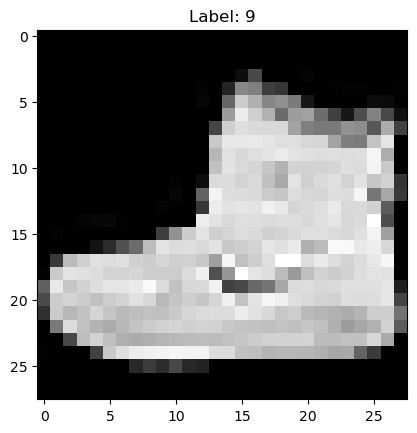

In [6]:
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()


In [7]:
# TODO:count the number of unique classes in your target variable
np.unique_counts(y_train)

UniqueCountsResult(values=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), counts=array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

In [9]:
class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]


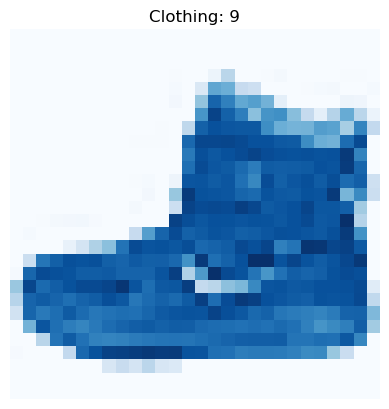

In [8]:
# TODO: view one training example
plt.imshow(x_train[0], cmap='Blues')
plt.title(f"Clothing: {y_train[0]}")
plt.axis('off')
plt.show()

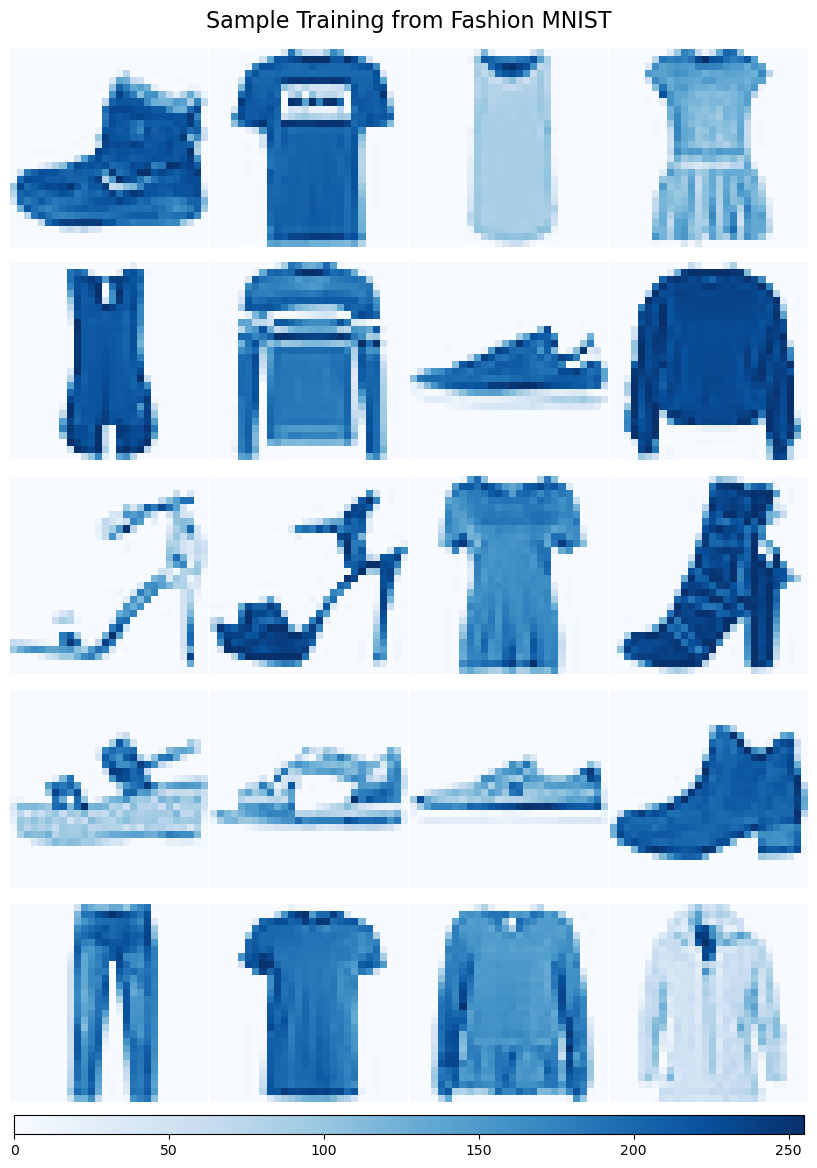

In [10]:
# helper function to view images of clothes
def plot_gallery(title, images, n_col=4, n_row=5):
    fig, axs = plt.subplots(
        nrows=n_row,
        ncols=n_col,
        figsize=(2.0 * n_col, 2.3 * n_row),
        constrained_layout=True,
    )
    fig.set_constrained_layout_pads(w_pad=0.01, h_pad=0.02, hspace=0, wspace=0)
    fig.set_edgecolor("black")
    fig.suptitle(title, size=16)

    for ax, vec in zip(axs.flat, images):
        im = ax.imshow(
            vec.reshape((28, 28)),
            cmap='Blues',
            interpolation="nearest"
        )
        ax.axis("off")

    fig.colorbar(im, ax=axs, orientation="horizontal", shrink=0.99, aspect=40, pad=0.01)
    plt.show()

plot_gallery("Sample Training from Fashion MNIST", x_train)

## kNN + PCA Implementation 

Utilize the PCA algorithm to decompose your highly dimensional dataset into fewer components and then utilize kNN to check if you've created a sufficient model.

In [11]:
from sklearn.decomposition import PCA

import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [13]:
# flatten your data files
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

print("new x_train shape", x_train_flat.shape)
print("new x_test shape", x_test_flat.shape)
#x_train_flat = x_train.reshape(-1, 28*28)
#x_test_flat = x_test.reshape(-1, 28*28)


new x_train shape (60000, 784)
new x_test shape (10000, 784)


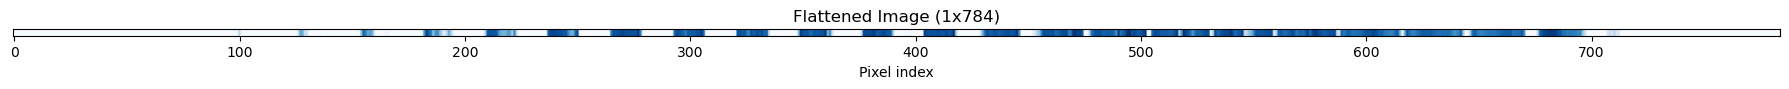

In [16]:
# visualize your flattened data
plt.figure(figsize=(18, 1))
plt.imshow(x_train_flat[0].reshape(1, -1), cmap='Blues', aspect='auto')
plt.title("Flattened Image (1x784)")
plt.xlabel("Pixel index")
plt.yticks([])
plt.tight_layout()
plt.show()

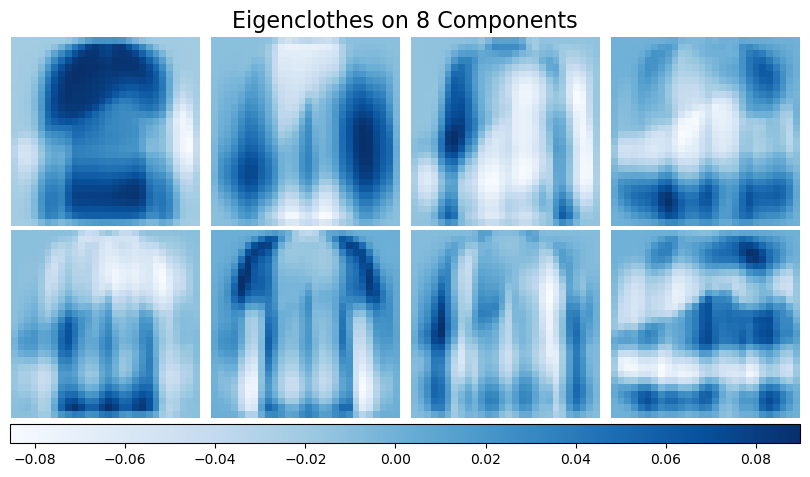

In [17]:
# TODO: initialize PCA to reduce your flattened data to 8 components for visualization
pca_estimator = PCA(n_components=8)

pca_estimator.fit(x_train_flat)
plot_gallery("Eigenclothes on 8 Components", pca_estimator.components_, 4, 2)

In [18]:
# TODO: create 50 components using PCA
pca = PCA(n_components=50)

# TODO: convert our training & testing predictors variables to 100 basic components
X_train_pca = pca.fit_transform(x_train_flat)
X_test_pca = pca.transform(x_test_flat)

X_train_pca.shape

(60000, 50)

In [19]:
# TODO: implement random-search on the knn model to find best hyperparams
params = {
    "n_neighbors": range(5, 50, 5),
    "weights": ["uniform", "distance"],
    "metric": ["cityblock", "cosine", "euclidean", "minkowski"]
}

knn = KNeighborsClassifier()

# TODO: set up RandomizedSearchCV with 5-fold cross-validation
random_search = RandomizedSearchCV(
    knn,
    param_distributions=params,
    n_iter=20,
    scoring='accuracy',
    n_jobs=-1,
    cv=5,
    verbose=1,
    random_state=42
)

# TODO: fit this model on your PCA training data
random_search.fit(X_train_pca, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=20, n_jobs=-1,
                   param_distributions={'metric': ['cityblock', 'cosine',
                                                   'euclidean', 'minkowski'],
                                        'n_neighbors': range(5, 50, 5),
                                        'weights': ['uniform', 'distance']},
                   random_state=42, scoring='accuracy', verbose=1)

In [25]:
# TODO: extract the best estimator
best_knn = random_search.best_estimator_

# TODO: predict on testing data
yhat = best_knn.predict(X_test_pca)

# TODO: evaluate its accuracy
confusion_mat = confusion_matrix(y_test, yhat)
class_report = classification_report(y_test, yhat)
accuracy = accuracy_score(y_test, yhat)

print("Accuracy Score\n",accuracy)
print("Confusion Matrix\n", confusion_mat)
print("Classification Report\n", class_report)

Accuracy Score
 0.8586
Confusion Matrix
 [[844   1  19  17  10   3  98   0   8   0]
 [  8 964   1  15   5   0   6   0   1   0]
 [ 22   3 792   8 100   1  71   0   3   0]
 [ 47   9  19 867  35   1  18   0   4   0]
 [  3   0 114  28 790   0  62   0   3   0]
 [  0   0   0   0   0 906   0  58   1  35]
 [180   3 114  28  95   0 566   0  14   0]
 [  0   0   0   0   0  14   0 937   0  49]
 [  0   0   8   6   5   4   8   6 962   1]
 [  0   0   0   0   0   6   0  35   1 958]]
Classification Report
               precision    recall  f1-score   support

           0       0.76      0.84      0.80      1000
           1       0.98      0.96      0.97      1000
           2       0.74      0.79      0.77      1000
           3       0.89      0.87      0.88      1000
           4       0.76      0.79      0.77      1000
           5       0.97      0.91      0.94      1000
           6       0.68      0.57      0.62      1000
           7       0.90      0.94      0.92      1000
           8      

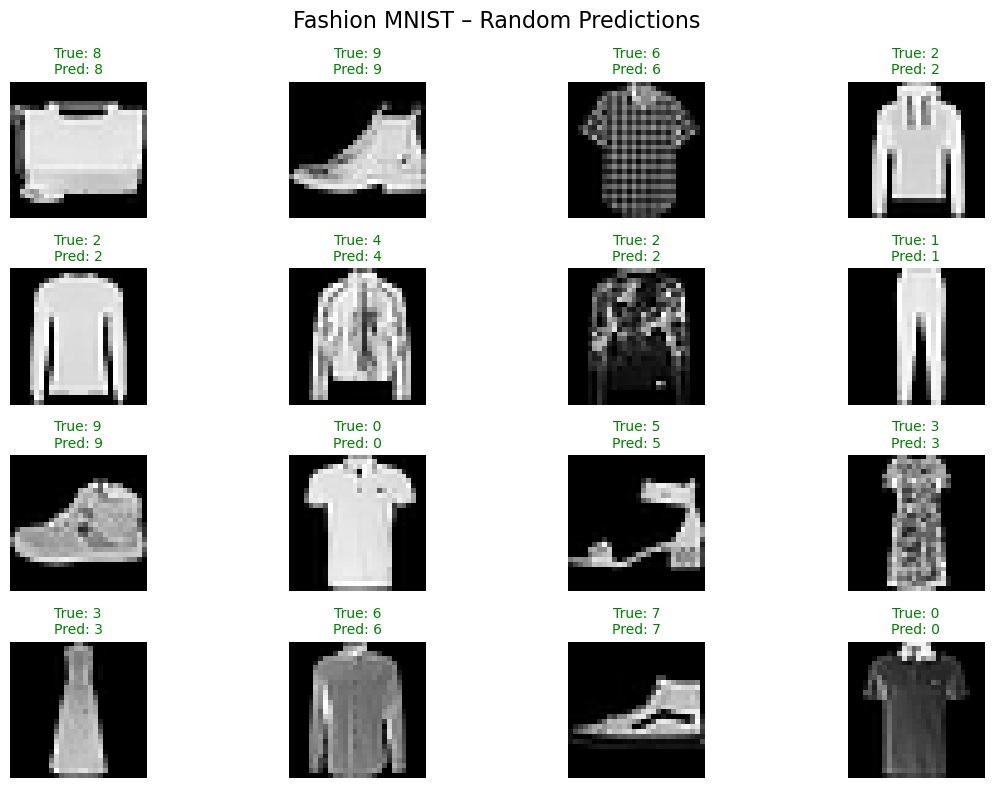

In [26]:
n_samples_to_plot = 16

# Randomly sample indices from the test set
sample_idxs = np.random.choice(len(y_test), n_samples_to_plot, replace=False)

plt.figure(figsize=(12, 8))
for i, idx in enumerate(sample_idxs):
    img = x_test[idx]                      # original image (28x28)
    true_label = y_test[idx]
    pred_label = yhat[idx]

    # Subplot setup
    plt.subplot(4, 4, i + 1)
    plt.imshow(img, cmap='gray')
    title_color = 'green' if true_label == pred_label else 'red'
    plt.title(f"True: {true_label}\nPred: {pred_label}", 
              color=title_color, fontsize=10)
    plt.axis('off')

plt.suptitle("Fashion MNIST – Random Predictions", fontsize=16)
plt.tight_layout()
plt.show()

## Keras Implementation

In [ ]:
# standardize your data before running your model
#x_train_flat_norm = x_train_flat / 255.0
#x_test_flat_norm = x_test_flat / 255.0

In [28]:
# TODO: Create a sequential model with at least 3 layers.
# Input layer: An input object with as many nodes as predictors
# Dense layer: a hidden layer with `relu` or `tanh` activation function
# Out layer: an output layer with as many nodes as classes and a `softmax` activation function
model_clothes = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])


c:\Users\Moe\anaconda3\envs\ds\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [29]:
# TODO: compile your model with the 'adam' optimizer, 'sparse_categorical_crossentropy' loss and 'accuracy' for metrics
model_clothes.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# TODO: fit your model for 10 models and 20% validation data
model_clothes.fit(x_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7366 - loss: 2.9197 - val_accuracy: 0.7864 - val_loss: 0.7731
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8012 - loss: 0.6407 - val_accuracy: 0.8215 - val_loss: 0.5855
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8221 - loss: 0.5314 - val_accuracy: 0.8185 - val_loss: 0.5418
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8287 - loss: 0.4954 - val_accuracy: 0.8391 - val_loss: 0.4655
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8410 - loss: 0.4476 - val_accuracy: 0.8465 - val_loss: 0.4532
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8502 - loss: 0.4231 - val_accuracy: 0.8401 - val_loss: 0.4624
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8548 - loss: 0.4078 - val_accuracy: 0.8424 - val_loss: 0.4363
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8571 - loss: 0.3937 - 

In [30]:
# measure the accuract of your model on your test set
loss, accuracy = model_clothes.evaluate(x_test, y_test, verbose=0)
print(f"Loss: {loss}, Test Accuracy: {accuracy}")

Loss: 0.43131065368652344, Test Accuracy: 0.8483999967575073


In [31]:
# generate predictions for later evaluation
yhat = model_clothes.predict(x_test)

predicted_classes = np.argmax(yhat, axis=1)
predicted_classes

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([9, 2, 1, ..., 8, 1, 5])

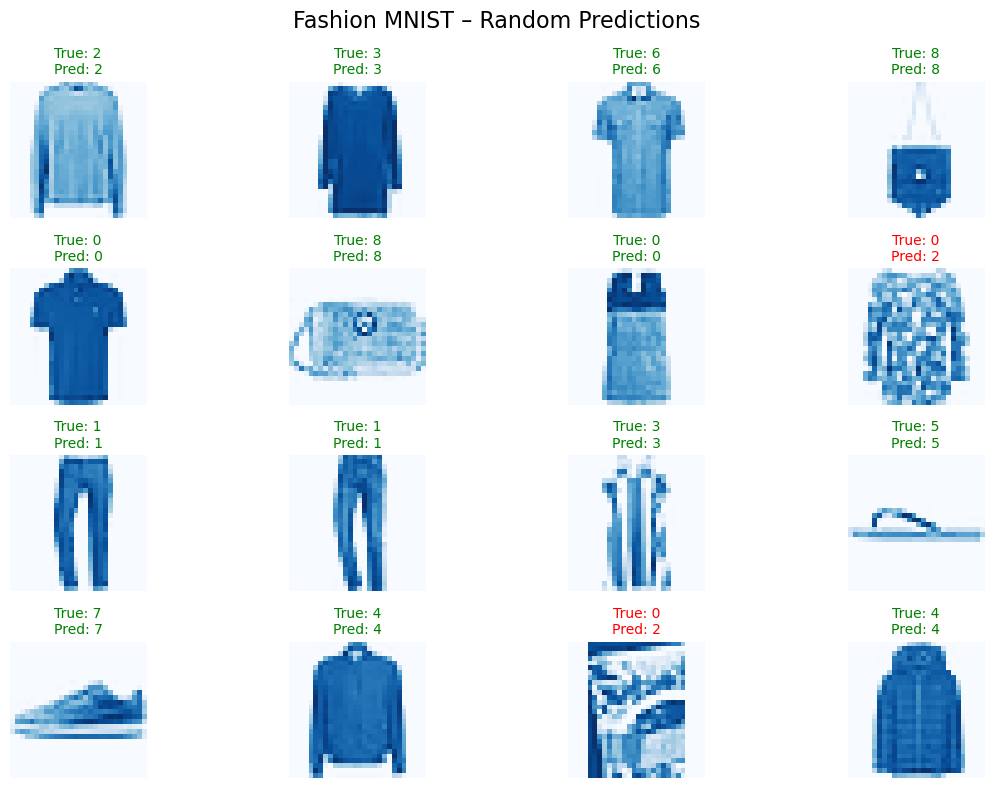

In [32]:
n_samples_to_plot = 16

# Randomly sample indices from the test set
sample_idxs = np.random.choice(len(y_test), n_samples_to_plot, replace=False)

plt.figure(figsize=(12, 8))
for i, idx in enumerate(sample_idxs):
    img = x_test[idx]                      # original image (28x28)
    true_label = y_test[idx]
    pred_label = predicted_classes[idx]

    # Subplot setup
    plt.subplot(4, 4, i + 1)
    plt.imshow(img, cmap='Blues')
    title_color = 'green' if true_label == pred_label else 'red'
    plt.title(f"True: {true_label}\nPred: {pred_label}", 
              color=title_color, fontsize=10)
    plt.axis('off')

plt.suptitle("Fashion MNIST – Random Predictions", fontsize=16)
plt.tight_layout()
plt.show()

In [35]:
model_clothes.evaluate(x_test, y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8484 - loss: 0.4313


[0.43131065368652344, 0.8483999967575073]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


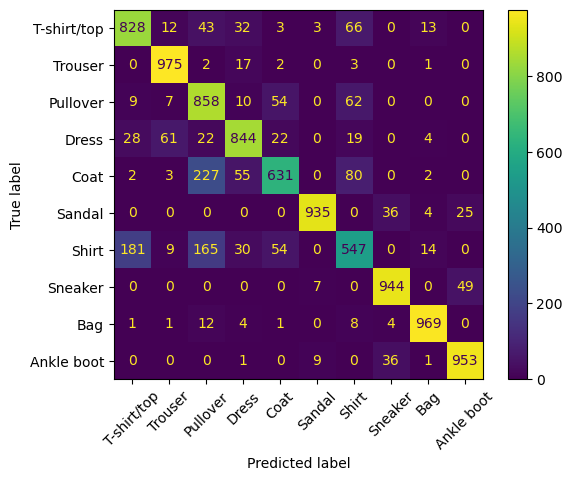

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model_clothes.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=class_names).plot(xticks_rotation=45)


In [39]:
model_clothes.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 328,160 (1.25 MB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 218,774 (854.59 KB)

In [40]:
# extract weights & balances
weights, biases = model_clothes.layers[1].get_weights()

print("weights shape:", weights.shape)  # (784, 128)
print("biases shape:", biases.shape)    # (128,)


weights shape: (784, 128)
biases shape: (128,)


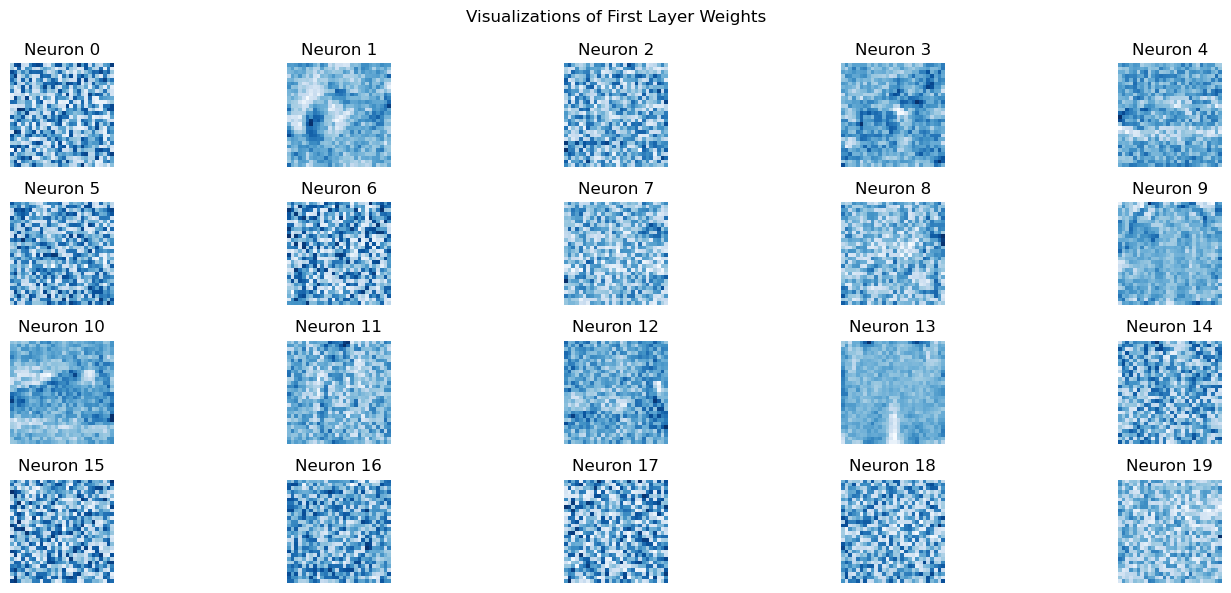

In [41]:
# Visualize the first 20 neurons' weight vectors as 64x64 images
fig, axes = plt.subplots(4, 5, figsize=(15, 6))

for i, ax in enumerate(axes.flat):
    weight_vector = weights[:, i]
    weight_image = weight_vector.reshape((28, 28))  # reshape from 4096 to 64x64

    ax.imshow(weight_image, cmap='Blues')
    ax.set_title(f'Neuron {i}')
    ax.axis('off')

plt.suptitle("Visualizations of First Layer Weights")
plt.tight_layout()
plt.show()

In [42]:
# serialize your model
model_clothes.save("model.keras")

To run your clothing prediction algorithm in streamlit, install the dependencies below in your `ds` environment and then run `streamlit run cloth-predict.py` in your terminal!

In [43]:
!pip install streamlit opencv-python pillow

  Using cached altair-5.5.0-py3-none-any.whl.metadata (11 kB)
  Using cached blinker-1.9.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached toml-0.10.2-py2.py3-none-any.whl.metadata (7.1 kB)
  Using cached watchdog-6.0.0-py3-none-win_amd64.whl.metadata (44 kB)
  Using cached pydeck-0.9.1-py2.py3-none-any.whl.metadata (4.1 kB)
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ------------------------------------ --- 9.2/9.9 MB 47.4 MB/s eta 0:00:01
   ---------------------------------------- 9.9/9.9 MB 38.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
   --------------- ------------------------ 14.9/39.0 MB 67.0 MB/s eta 0:00:01
   ------------------------------ --------- 29.4/39.0 MB 66.6 MB/s eta 0:00:01
   ---------------------------------------  38.8/39.0 MB 66.7 MB/s eta 0:00:01
   ---------------------------------------- 39.0/39.0 MB 57.6 MB/s eta 0:00:00
Using cached altair-5.5.0-py3-none-any.whl (731 kB)
Using cach